# Loan Prediction 
By Nohan Joemon <br>


## Contents
### A: <a href="#A">Reading the data</a>
### B: <a href="#B">Visualizations from the dataset</a>
### C: <a href="#C">Training</a>
### D: <a href="#D">Analyzing the results</a>
### E: <a href="#E">Generating the csv file that contains predictions</a>
### F: <a href="#F">Further scope</a>

# A: <span id="A">Reading the data</span>

In [7]:
import pandas as pd
dataset = pd.read_csv('train.csv')
print(dataset.shape)
dataset.head()

(131447, 13)


,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10156551,18375,6,1,95000.0,2,1,21.45,3,17,28,1,3.0
1,10115057,4000,3,4,-1.0,2,2,21.64,0,18,33,0,2.0
2,10030395,15000,10,1,83000.0,2,2,22.90,3,11,44,1,3.0
3,10158544,27500,10,0,100000.0,1,2,9.66,0,5,14,1,2.0
4,10117658,9450,-1,5,28000.0,0,1,34.89,1,9,24,0,2.0


##### Note: We do not require datapreprocessing for this dataset because it has no null values and all variables are numerical

# B: <span id="B">Visualizations from the dataset</span>

In [8]:
# Importing seaborn and changing settings
import seaborn as sns
sns.set()
sns.set(style="darkgrid")

import warnings
warnings.filterwarnings("ignore")

##### Note:  Since there are a lot of features, I am providing visualizations of only the most important features and the ones that provide insights

## 1: Interest_Rate vs Debt_To_Income 

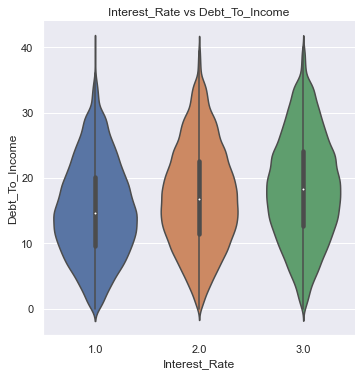

In [9]:
ax=sns.catplot(x="Interest_Rate", y="Debt_To_Income",kind="violin",data=dataset);
ax.set(title="Interest_Rate vs Debt_To_Income")

We find that customers having low debt-to-income ratio are given low interest rates. This might be because the bank wants to attract the customers who have high income (and low debt) by giving them low interest rate for their loans. The bank might want to repel the customers having low income (and high debt) because these customers are less likely to pay back the loan on time 

## 2: Interest_Rate vs Loan_Amount_Requested

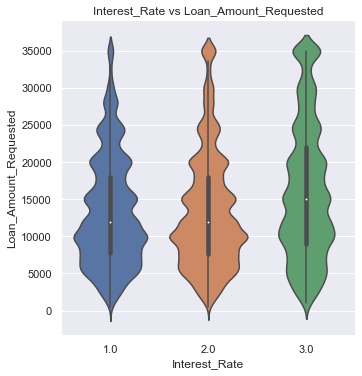

In [10]:
ax=sns.catplot(x="Interest_Rate", y="Loan_Amount_Requested",kind="violin",data=dataset);
ax.set(title="Interest_Rate vs Loan_Amount_Requested")

(Upper half of the plot) We find that for most customers who request high loan amount, the interest rate levied is high.<br>
(Lower half of the plot) We find that for most customers who request low loan amount, the interest rate levied is medium or low. <br>

If bank levies high interest rate on high loan amounts and low interest rate on low loan amounts, the interest amount  gained by the bank from high loan customers is extremely high . This profit might be singlehandedly beat the case where its low interest rate for high loan amount and high interest rate for low loan amount. That might be the reason why bank considered this decision.

## 3: Interest_Rate vs Purpose_Of_Loan

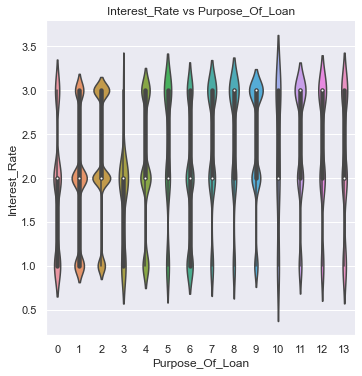

In [11]:
ax=sns.catplot(y="Interest_Rate", x="Purpose_Of_Loan",kind="violin",data=dataset);
ax.set(title="Interest_Rate vs Purpose_Of_Loan")

For some purposes, the interest rate levied is on the higher side. eg: 7,8,9,10,11,12,13 <br>
For some purposes, the interest rate levied is on the lower side. eg: 0,3<br>
Rest of the cases have no effect on interest rate. eg: 1,2<br>

This is understandable because the interest rate for Home loan, Education loan, Agriculture loan etc would be quite different

## 4: Plotting interest rates of most important features, two features at once

We can notice in <a href="#D">Analyzing the results</a> that the top 3 important features for our prediction are: <br>"Income_Verified", "Inquiries_Last_6Mo" and "Purpose_Of_Loan"
<br><br>The following visualizations are heatmaps of these features, taken two at once.
<br> <B> I have taken the "mode" of Interest_Rate values as the value in heatmap

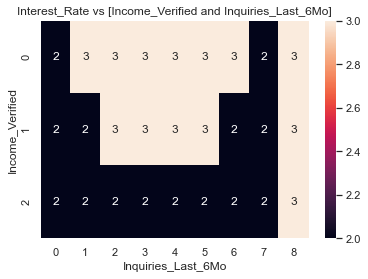

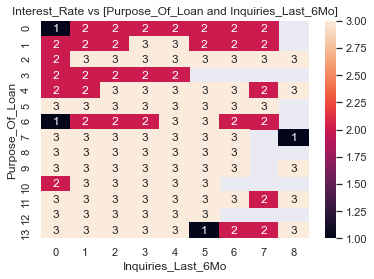

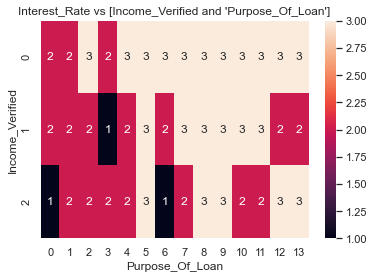

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import statistics
df_heatmap = dataset.pivot_table(values='Interest_Rate',index='Income_Verified',columns='Inquiries_Last_6Mo',aggfunc=statistics.mode)
ax=sns.heatmap(df_heatmap,annot=True)
ax.set(title="Interest_Rate vs [Income_Verified and Inquiries_Last_6Mo]")
plt.show()

import numpy as np
import matplotlib.pyplot as plt
import statistics
df_heatmap = dataset.pivot_table(values='Interest_Rate',index='Purpose_Of_Loan',columns='Inquiries_Last_6Mo',aggfunc=statistics.mode)
ax=sns.heatmap(df_heatmap,annot=True)
ax.set(title="Interest_Rate vs [Purpose_Of_Loan and Inquiries_Last_6Mo]")
plt.show()

import numpy as np
import matplotlib.pyplot as plt
import statistics
df_heatmap = dataset.pivot_table(values='Interest_Rate',index='Income_Verified',columns='Purpose_Of_Loan',aggfunc=statistics.mode)
ax=sns.heatmap(df_heatmap,annot=True)
ax.set(title="Interest_Rate vs [Income_Verified and 'Purpose_Of_Loan']")
plt.show()

# C: <span id="C">Training</span>

## 1: Model_selection<br>
#### Link to the complete notebook on model selection:  [Click here](model-selection.ipynb)

I tried many models and concluded that XGBoost is the best model for this problem.
#### Models which I tried:<br>
KNN, Logistic Regression, Naive Bayes, Decision tree, Random Forest, XGBoost, MLP, Stochastic Gradient Boosting
#### Choosen model: <br>
XGBoost
## 2: Hyperparameter Tuning
#### Link to the complete notebook on hyperparameter tuning:  [Click here](hyperparameter-tuning.ipynb)
I tried the hyperparameter tuning given <a href="https://medium.com/subex-ai-labs/efficient-hyperparameter-optimization-for-xgboost-model-using-optuna-3ee9a02566b1">here</a>.
#### Result of hyperparameter_tuning:<br>
{'n_estimators': 859, 'max_depth': 3, 'reg_alpha': 2, 'reg_lambda': 5, 'min_child_weight': 2, 'gamma': 1, 'learning_rate': 0.1089550046457381, 'colsample_bytree': 0.26}

I further found that if we decrease the test_train_split ratio to 0.1, accuracy increases. Since the dataset is large, this is valid. However, I am not very sure if its appropriate to do so because usually 0.2-0.25 is considered normal
## 3: Final Model

In [7]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Training the XG Boost model on the Training set
from xgboost import XGBClassifier
classifier = XGBClassifier(n_estimators=859,max_depth=3,reg_alpha=2,reg_lambda=5,min_child_weight=2,gamma=1,learning_rate=0.1089550046457381,colsample_bytree=0.26)
classifier.fit(X_train, y_train)

## Making the Confusion Matrix for train set
print("\n TRAIN DATA")
from sklearn.metrics import confusion_matrix, accuracy_score
y_train_pred = classifier.predict(X_train)
cm_train = confusion_matrix(y_train, y_train_pred)
print(cm_train)
print("accuracy score=",accuracy_score(y_train, y_train_pred))

## Making the Confusion Matrix for test set
print("\n TEST DATA")
from sklearn.metrics import confusion_matrix, accuracy_score
y_test_pred = classifier.predict(X_test)
cm_test = confusion_matrix(y_test, y_test_pred)
print(cm_test)
print("accuracy score=",accuracy_score(y_test, y_test_pred))

[15:09:44] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 TRAIN DATA
[[ 4882 16041  3468]
 [ 3235 34322 13377]
 [  842 16728 25407]]
accuracy score= 0.5461530658822336

 TEST DATA
[[ 526 1849  377]
 [ 394 3683 1595]
 [ 108 1914 2699]]
accuracy score= 0.5255230125523013


# D: <span id="D">Analyzing the results</span>

Since the given dataset has many features, we cannot plot the decision boundary. Therefore, I have given a heatmap of confusion matrix so that we can understand which all classes made most mistakes. I have also plotted the importance of different features in the prediction

## 1: Confusion Matrix visualization

[Text(0.5, 1.0, 'Confusion Matrix: Training Data')]

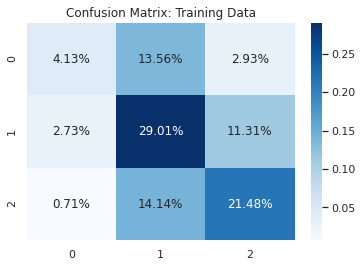

In [8]:
# TRAINING DATA

import numpy as np
ax=sns.heatmap(cm_train/np.sum(cm_train), annot=True, fmt='.2%', cmap='Blues')
ax.set(title="Confusion Matrix: Training Data")

[Text(0.5, 1.0, 'Confusion Matrix: Test Data')]

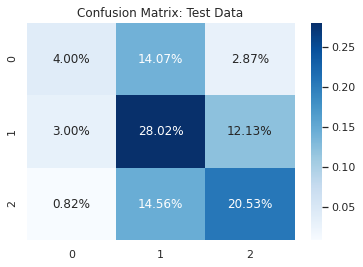

In [9]:
# TEST DATA

ax=sns.heatmap(cm_test/np.sum(cm_test), annot=True, fmt='.2%', cmap='Blues')
ax.set(title="Confusion Matrix: Test Data")

We observe that both train and test data have similar pattern of confusion matrix. The model works well for class=1,2. But for class=0, the model predicts class=1 most of the time. This might be because we have less data points that contain class=0

## 2: Importance of Various Features

In [10]:
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': classifier.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)
importances = importances.set_index('Feature')
importances

,Importance
Feature,
Income_Verified,0.282297
Inquiries_Last_6Mo,0.230062
Purpose_Of_Loan,0.124734
Loan_Amount_Requested,0.082907
Debt_To_Income,0.073438
Total_Accounts,0.049986
Home_Owner,0.049913
Annual_Income,0.048531
Length_Employed,0.020910


<AxesSubplot:xlabel='Feature'>

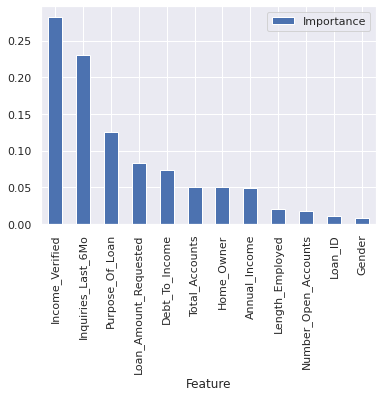

In [11]:
importances.plot.bar()

We observe that features like Loan_ID and gender have very less importance. This is expected because Loan_ID is just an id and gender is not something a bank looks into while fixing rate of interest(in general)

# E: <span id="E">Generating the csv file that contains predictions of given data</span>

In [12]:
X_given0 = pd.read_csv('../input/analyticsclubproject/test.csv')
X_given = sc.transform(X_given0)
y_pred_given = classifier.predict(X_given)
X_given_index = X_given0[:][['Loan_ID']]
column_values = ['Interest_Rate']
y_pred_given = pd.DataFrame(data=y_pred_given,columns = column_values)
submission = pd.concat([X_given_index, y_pred_given],axis=1)
submission.to_csv('Nohanprediction.csv',index=False)

# F: <span id="F">Further Scope</span>

<B> 1: Data Preprocessing: </B>Not much scope because the data is already structured with numerical values and without any missing values<br>
<B> 2: Model training: </B> Models which I tried out for this classification problem: KNN, Logistic Regression, Naive Bayes, Decision Tree, Random Forest, XGBoost, MultiLayer Perceptron, Stochastic Gradient Boosting. There are many other complex models that might produce better predictions. <br>
<B> 3: Dimensionality Reduction: </B> I did not focus on Dimensionality Reduction but I tried some basic techniques in [this](dimensionality-reduction.ipynb) notebook. There was no strong reason to reject any feature so I used all features